# Importing required libraries

In [194]:
from PIL import Image
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [195]:
im1 = Image.open("im1.png")
im2 = Image.open("im2.png")

# Images Used

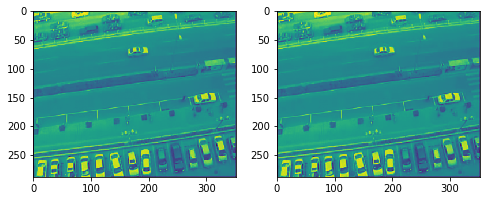

In [196]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(im1)
fig.add_subplot(1, 2, 2)
plt.imshow(im2)

In [197]:
np.shape(im1), np.shape(im2)

((288, 352), (288, 352))

# Initializing u and v arrays to zeros

In [209]:
u = np.zeros((288,352))
v = np.zeros((288,352))

# Kernels for x, y and t dimensions

In [199]:
kx = [[-1,1],[-1,1]]
ky = [[-1,-1],[1,1]]
kt = [[-1,-1],[-1,-1]]

# Laplacian Kernel for calculating divergence

In [200]:
kl = [[0,-0.25,0],[-0.25,1,-0.25],[0,-0.25,0]]

# Function for calculating derivatives

In [201]:
def derivatives(im1,im2):

    dx = signal.fftconvolve(im1, kx, mode='same') + signal.fftconvolve(im2, kx, mode='same') 
    dy = signal.fftconvolve(im1, ky, mode='same') + signal.fftconvolve(im2, ky, mode='same')
    dt = signal.fftconvolve(im1, kt, mode='same') + signal.fftconvolve(im2, kt, mode='same')
    
    return dx,dy,dt

In [210]:
dx,dy,dt = derivatives(im1,im2)

In [211]:
alpha = 1
D = alpha + dx**2 + dy**2

In [212]:
for i in range(1000):
    uav = signal.fftconvolve(u, kl, mode='same') 
    vav = signal.fftconvolve(v, kl, mode='same') 
    P = dx*uav + dy*vav + dt
    u = uav - dx*(P/D)
    v = vav - dy*(P/D)

# Optical Flow Display

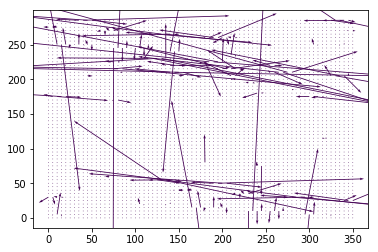

In [213]:
[r,c] = np.shape(u);
d = 5
IndX = range(0, r, d)
IndY = range(0, c, d)
[X,Y] = np.meshgrid(IndY, IndX)
U1 = np.zeros((len(X),len(Y)))
V1 = np.zeros((len(X),len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        U1[i,j] = u[IndX[i],IndY[j]]
        V1[i,j] = v[IndX[i],IndY[j]]

[r,c] = np.shape(U1)
[r2,c2] = np.shape(V1)
plt.quiver(X, Y, U1[range(r-1,0,-1),:], V1[range(r2-1,0,-1),:], 3)